<a href="https://colab.research.google.com/github/KaylumCassidy/FYP/blob/main/IrishWeather_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irish Weather

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime
minDate = "2017-01-01 00:00:00"

## Met Eire Hourly Data 2017-2023

### Cork

In [18]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/CorkAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
corkairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(corkairportds.columns)

# Convert the 'date' column to datetime format
corkairportds['date'] = pd.to_datetime(corkairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
corkairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
corkairportds['wdsp'] = corkairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
corkairportds = corkairportds[corkairportds['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


### Shannon Airport

In [25]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/ShannonAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
shannonAirport = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(shannonAirport.columns)

# Convert the 'date' column to datetime format
shannonAirport['date'] = pd.to_datetime(shannonAirport['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
shannonAirport['wdsp'].replace(to_replace=' ', value=0, inplace=True)
shannonAirport['wdsp'] = shannonAirport['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
shannonAirport = shannonAirport[shannonAirport['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


### Galway

In [26]:
import pandas as pd
import requests
from io import StringIO


github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Galway.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
galway = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(galway.columns)

# Convert the 'date' column to datetime format
galway['date'] = pd.to_datetime(galway['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
galway['wdsp'].replace(to_replace=' ', value=0, inplace=True)
galway['wdsp'] = galway['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
galway = galway[galway['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


###Dublin Airport

In [27]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/DublinAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
dublinairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(dublinairportds.columns)

# Convert the 'date' column to datetime format
dublinairportds['date'] = pd.to_datetime(dublinairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
dublinairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
dublinairportds['wdsp'] = dublinairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
dublinairportds = dublinairportds[dublinairportds['date'] >= minDate]


Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


In [28]:
dublinairportds.describe()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,clht,clamt
count,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.00000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000
mean,0.493765,0.087166,0.019594,10.113817,0.027614,8.597198,6.93634,10.400083,81.755172,1013.401697,2.000065,9.475866,2.000065,206.367919,14.756769,29.447388,0.169494,286.170055,5.583797
std,0.980092,0.420248,0.138602,5.062082,0.163866,4.457445,4.52180,3.173393,11.991678,12.671529,0.011420,4.681316,0.011420,81.329671,22.707006,26.964605,0.323256,401.147943,2.223360
min,0.000000,0.000000,0.000000,-5.600000,0.000000,-5.900000,-8.90000,3.100000,24.000000,961.800000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.600000,0.000000,5.400000,3.60000,7.900000,74.000000,1005.400000,2.000000,6.000000,2.000000,140.000000,2.000000,11.000000,0.000000,24.000000,4.000000
50%,0.000000,0.000000,0.000000,10.100000,0.000000,8.700000,7.10000,10.100000,84.000000,1014.900000,2.000000,9.000000,2.000000,230.000000,2.000000,11.000000,0.000000,50.000000,7.000000
75%,0.000000,0.000000,0.000000,13.700000,0.000000,12.000000,10.20000,12.500000,91.000000,1022.300000,2.000000,12.000000,2.000000,270.000000,21.000000,62.000000,0.100000,250.000000,7.000000
max,3.000000,13.800000,1.000000,29.100000,1.000000,21.400000,19.50000,22.600000,100.000000,1048.200000,4.000000,44.000000,4.000000,360.000000,97.000000,98.000000,1.000000,999.000000,9.000000


### Malin Head

In [29]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Malin%20Head.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
malinHead = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(malinHead.columns)

# Convert the 'date' column to datetime format
malinHead['date'] = pd.to_datetime(malinHead['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
malinHead['wdsp'].replace(to_replace=' ', value=0, inplace=True)
malinHead['wdsp'] = malinHead['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
malinHead = malinHead[malinHead['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


### BELMULLET

In [30]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/BELMULLET.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
belmullet = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(belmullet.columns)

# Convert the 'date' column to datetime format
belmullet['date'] = pd.to_datetime(belmullet['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
belmullet['wdsp'].replace(to_replace=' ', value=0, inplace=True)
belmullet['wdsp'] = belmullet['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
belmullet = belmullet[belmullet['date'] >= minDate]

# Now you can continue with your data analysis or processi

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


## Merge DataBase

In [36]:
left = belmullet.set_index(['date']).copy()
right = dublinairportds.set_index(['date'])
#right.index = right.index.tz_convert(None)

newdf = left.join(right, lsuffix="_BEL", rsuffix="_DUB")

right = shannonAirport.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_SHA")

right = corkairportds.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_COR")

right = galway.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_GAL")

right = malinHead.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_DON")

newdf = newdf.reset_index()

In [37]:

newdf.columns

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'ind.3_BEL', 'wdsp_BEL', 'ind.4_BEL', 'wddir_BEL', 'ind_DUB',
       'rain_DUB', 'ind.1_DUB', 'temp_DUB', 'ind.2_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'ind.3_DUB',
       'wdsp_DUB', 'ind.4_DUB', 'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht',
       'clamt', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'ind_COR',
       'rain_COR', 'ind.1_COR', 'temp_COR', 'ind.2_COR', 'wetb_COR',
       'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR', 'ind.3_COR',
       'wdsp_COR', 'ind.4_COR', 'wddir_COR', 'ind_GAL', 'rain_GAL',
       'ind.1_GAL', 'temp_GAL', 'ind.2_GAL', 'wetb_GAL', 'dewpt_GAL',
       'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'ind.3_GAL', 'wdsp_GAL',
   

In [34]:

newdf

,date,ind_BEL,rain_BEL,ind.1_BEL,temp_BEL,ind.2_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,...,ind.2_GAL,wetb_GAL,dewpt_GAL,vappr_GAL,rhum_GAL,msl_GAL,ind.3_GAL,wdsp_GAL,ind.4_GAL,wddir_GAL
0,2017-01-01 00:00:00,0,0.0,0,5.2,0,3.9,2.0,7.1,79,...,0,4.5,3.6,7.9,89,1021.9,2,8.0,2,320
1,2017-01-01 01:00:00,0,0.5,0,4.7,0,3.4,1.4,6.8,78,...,0,4.1,3.1,7.6,89,1022,2,9.0,2,320
2,2017-01-01 02:00:00,0,0.0,0,5.7,0,3.8,0.7,6.4,70,...,0,3.6,2.7,7.4,90,1022.1,2,8.0,2,320
3,2017-01-01 03:00:00,0,0.4,0,5.6,0,3.3,-0.6,5.9,64,...,0,2.8,1.6,6.9,87,1022.5,2,9.0,2,330
4,2017-01-01 04:00:00,0,0.6,0,4.7,0,3.1,0.5,6.3,74,...,0,2.6,1.6,6.8,89,1022.7,2,8.0,2,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2023-12-31 20:00:00,0,0.1,0,8.2,0,6.5,4.3,8.3,76,...,0,5.9,4.8,8.6,87,993.1,2,9.0,2,280
61341,2023-12-31 21:00:00,0,0.0,0,7.6,0,5.9,3.7,8.0,76,...,0,5.7,4.7,8.6,89,994.4,2,11.0,2,290
61342,2023-12-31 22:00:00,0,0.0,0,7.5,0,5.9,3.6,7.9,76,...,0,5.1,3.8,8,85,995.3,2,10.0,2,280
61343,2023-12-31 23:00:00,0,0.1,0,7.4,0,5.7,3.4,7.8,75,...,0,4.3,2.9,7.5,83,996.3,2,8.0,2,280


In [40]:
newdf['wdsp_BEL'].describe()

count    61345.000000
mean        11.884114
std          6.536866
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max         45.000000
Name: wdsp_BEL, dtype: float64

In [42]:

newdf.to_csv("IrelandWeatherData.csv", index=False)

## EDA of weather data

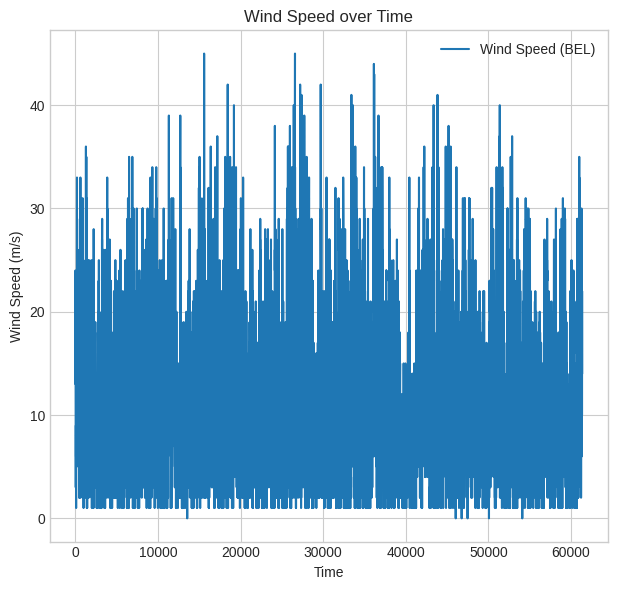

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 6))

# Wind Speed
plt.subplot(1, 2, 1)
plt.plot(newdf['wdsp_BEL'], label='Wind Speed (BEL)')
plt.title('Wind Speed over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()

plt.tight_layout()
plt.show()
